# Лабораторная № 2 по предмету "Нейронные сети" 
## на тему "Рекуррентные нейронные сети RNN, LSTM, GRU"
Выполнена Якушевым Георгием, гр. 8307

In [2]:
# Подгружаем необходимые модули
import torch
from torch import nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## - Задаём различные архитектуры нейронных сетей -

### Архитектура # 1 - Классическая архитектура типа RNN ⚡

In [69]:
# Архитектура № 1
class RNN_classic(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(RNN_classic, self).__init__()
        self.hidden_size=hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        hidden = torch.zeros(1, x.size(0), self.hidden_size)
        r_out, hidden = self.rnn(x, hidden.detach())
        output = self.fc(r_out[:, -1, :])
        return output

Epoch: 0, Loss: 0.07728
Epoch: 100, Loss: 0.00224
Epoch: 200, Loss: 0.08349
output tensor is -> 
test input is: tensor([[[0.5231],
         [0.6820],
         [0.8137]]])
tensor([[0.8141]], grad_fn=<AddmmBackward0>)


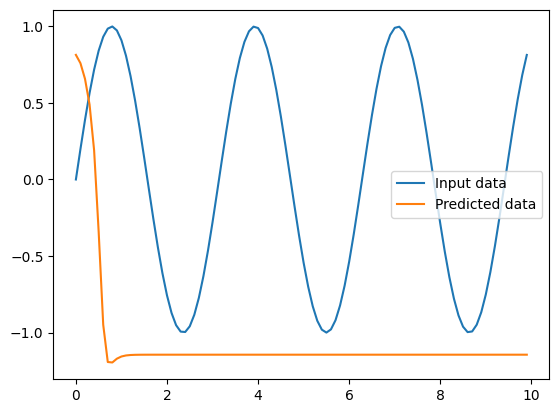

In [72]:
t = np.arange(0, 10, 0.1)
data = np.sin(2* t) # + np.random.normal(0, 0.2, len(t))

# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 4
output_size = 1
model = RNN_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 300
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()

Epoch: 0, Loss: 0.00680
Epoch: 100, Loss: 0.00869
Epoch: 200, Loss: 0.00244
output tensor is -> 
test input is: tensor([[[ 0.2734],
         [-0.5332],
         [-1.2863]]])
tensor([[-0.2907]], grad_fn=<AddmmBackward0>)


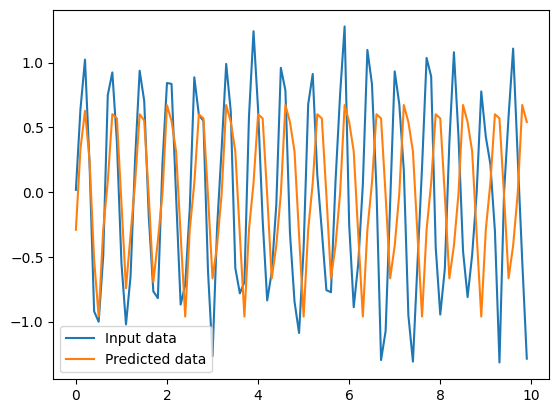

In [43]:
t = np.arange(0, 10, 0.1)
data = np.sin(10* t) + np.random.normal(0, 0.2, len(t))

# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 32
output_size = 1
model = RNN_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 300
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()

Epoch: 0, Loss: 0.79266
Epoch: 100, Loss: 0.02034
Epoch: 200, Loss: 0.01820
Epoch: 300, Loss: 0.03390
Epoch: 400, Loss: 0.23026
output tensor is -> 
test input is: tensor([[[-0.3922],
         [-0.8685],
         [-1.3928]]])
tensor([[-0.8548]], grad_fn=<AddmmBackward0>)


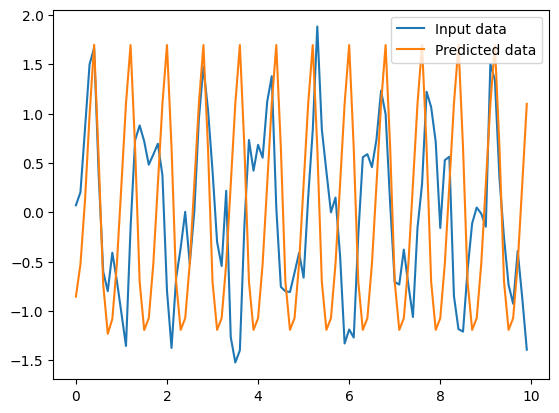

In [51]:
# Задаём начальные данные - временной ряд
t = np.arange(0, 10, 0.1)
data = np.sin(5*t) + 0.5*np.sin(50*t) + np.random.normal(0, 0.2, len(t))
# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 32
output_size = 1
model = RNN_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 500
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()

Архитектура # 2 - Классическая архитектура типа LSTM ⚡

In [42]:
# Архитектура № 2 - LSTM 
class LSTM_classic(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(LSTM_classic, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, input):
        lstm_out, _ = self.lstm(input)
        output = self.fc(lstm_out[:, -1, :])
        return output

Epoch: 0, Loss: 0.13726
Epoch: 100, Loss: 0.00673
Epoch: 200, Loss: 0.01164
Epoch: 300, Loss: 0.00577
Epoch: 400, Loss: 0.00704
output tensor is -> 
test input is: tensor([[[0.5231],
         [0.6820],
         [0.8137]]])
tensor([[0.9717]], grad_fn=<AddmmBackward0>)


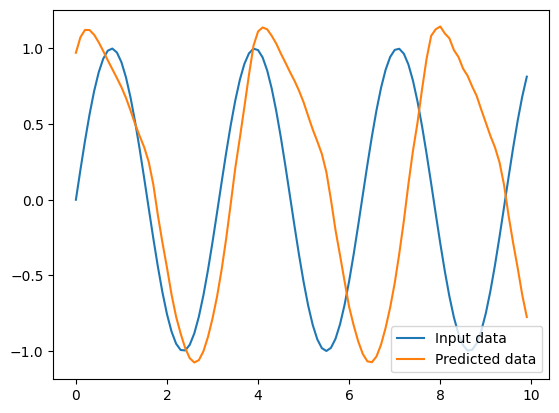

In [74]:
t = np.arange(0, 10, 0.1)
data = np.sin(2 * t)# + np.random.normal(0, 0.2, len(t))

# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 4
output_size = 1
model = LSTM_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 500
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()

Epoch: 0, Loss: 0.01572
Epoch: 100, Loss: 0.00610
Epoch: 200, Loss: 0.01547
output tensor is -> 
test input is: tensor([[[ 0.2266],
         [-0.6580],
         [-0.8810]]])
tensor([[-0.1777]], grad_fn=<AddmmBackward0>)


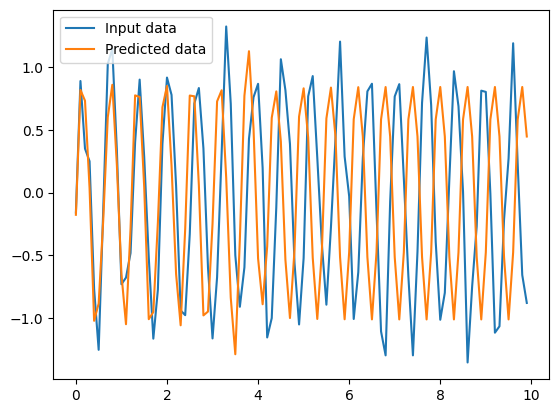

In [48]:
t = np.arange(0, 10, 0.1)
data = np.sin(10* t) + np.random.normal(0, 0.2, len(t))

# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 32
output_size = 1
model = LSTM_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 300
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()

Epoch: 0, Loss: 0.04968
Epoch: 100, Loss: 0.01588
Epoch: 200, Loss: 0.00336
Epoch: 300, Loss: 0.01030
Epoch: 400, Loss: 0.00462
output tensor is -> 
test input is: tensor([[[-0.9725],
         [-0.9327],
         [-1.2389]]])
tensor([[-1.0619]], grad_fn=<AddmmBackward0>)


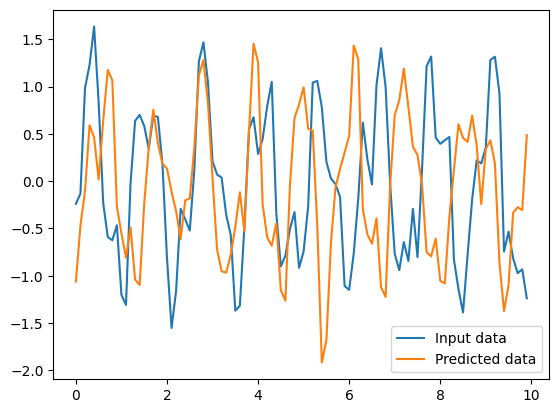

In [45]:
# Задаём начальные данные - временной ряд
t = np.arange(0, 10, 0.1)
data = np.sin(5*t) + 0.5*np.sin(50*t) + np.random.normal(0, 0.2, len(t))
# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 32
output_size = 1
model = LSTM_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 500
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()

Архитектура # 3 - Модель GRU⚡

In [77]:
# Архитектура № 3 - GRU
class GRU_classic(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(GRU_classic, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, input):
        lstm_out, _ = self.gru(input)
        output = self.fc(lstm_out[:, -1, :])
        return output

Epoch: 0, Loss: 0.11249
Epoch: 100, Loss: 0.02036
Epoch: 200, Loss: 0.00380
Epoch: 300, Loss: 0.00025
Epoch: 400, Loss: 0.00506
output tensor is -> 
test input is: tensor([[[0.5231],
         [0.6820],
         [0.8137]]])
tensor([[0.9181]], grad_fn=<AddmmBackward0>)


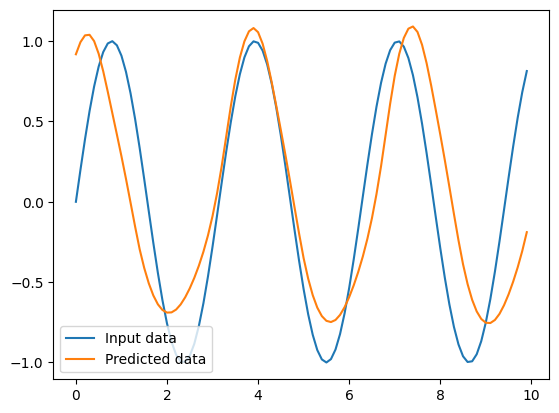

In [78]:
t = np.arange(0, 10, 0.1)
data = np.sin(2 * t)# + np.random.normal(0, 0.2, len(t))

# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 4
output_size = 1
model = GRU_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 500
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()

Epoch: 0, Loss: 0.16644
Epoch: 100, Loss: 0.02195
Epoch: 200, Loss: 0.08929
output tensor is -> 
test input is: tensor([[[ 0.1026],
         [-0.7048],
         [-0.8564]]])
tensor([[-0.2301]], grad_fn=<AddmmBackward0>)


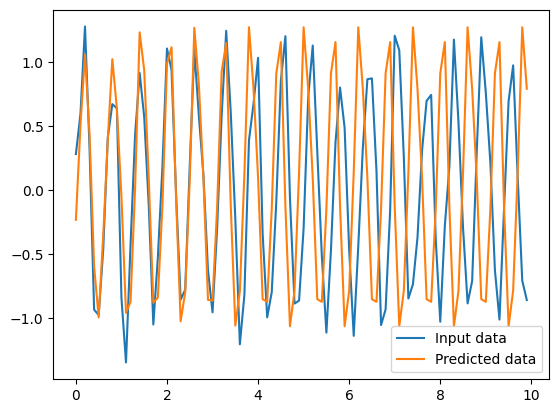

In [79]:
t = np.arange(0, 10, 0.1)
data = np.sin(10* t) + np.random.normal(0, 0.2, len(t))

# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 4
output_size = 1
model = GRU_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 300
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()

Epoch: 0, Loss: 0.77304
Epoch: 100, Loss: 0.11689
Epoch: 200, Loss: 0.16648
Epoch: 300, Loss: 0.18621
Epoch: 400, Loss: 0.19300
output tensor is -> 
test input is: tensor([[[-0.4364],
         [-1.1438],
         [-0.8786]]])
tensor([[-0.3075]], grad_fn=<AddmmBackward0>)


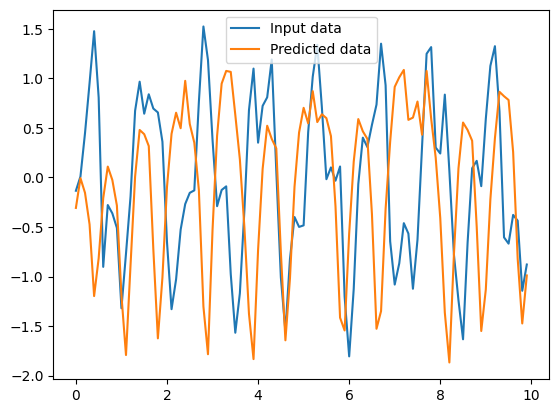

In [81]:
# Задаём начальные данные - временной ряд
t = np.arange(0, 10, 0.1)
data = np.sin(5*t) + 0.5*np.sin(50*t) + np.random.normal(0, 0.2, len(t))
# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 4
output_size = 1
model = GRU_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 500
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()

Epoch: 0, Loss: 0.00061
Epoch: 100, Loss: 0.00060
Epoch: 200, Loss: 0.02879
Epoch: 300, Loss: 0.20319
Epoch: 400, Loss: 0.00042
output tensor is -> 
test input is: tensor([[[-0.5956],
         [-0.5713],
         [-1.0360]]])
tensor([[-0.7118]], grad_fn=<AddmmBackward0>)


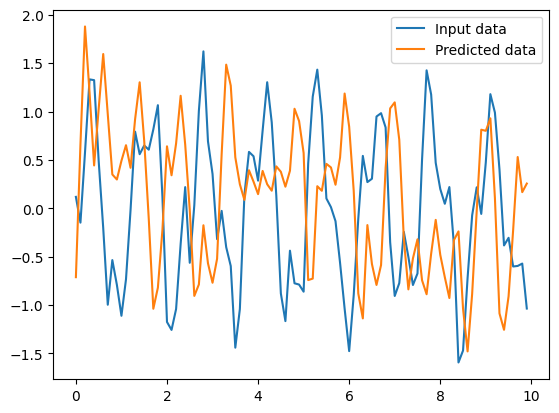

In [82]:
# Задаём начальные данные - временной ряд
t = np.arange(0, 10, 0.1)
data = np.sin(5*t) + 0.5*np.sin(50*t) + np.random.normal(0, 0.2, len(t))
# Определяем параметры модели и создаем ее экземпляр
input_size = 1
hidden_size = 64
output_size = 1
model = GRU_classic(input_size, output_size, hidden_size)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Обучаем модель на примере данных
epochs = 500
for epoch in range(epochs):
    for i in range(len(data)-4):
        input_tensor = torch.tensor(data[i:i+3], dtype=torch.float32).view(1, 3, -1)
        target_tensor = torch.tensor(data[i+3], dtype=torch.float32).view(1, -1)
        optimizer.zero_grad()
        model_output = model(input_tensor)
        loss = criterion(model_output, target_tensor)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {:.5f}".format(epoch, loss.item()))
print("output tensor is -> ")
# Прогнозируем следующие значения
test_input = torch.tensor(data[-3:], dtype=torch.float32).view(1, 3, -1)
print("test input is:",test_input)
print(model(test_input))
predicted_output = [model(test_input).item()]

for i in range(99):
    test_input[0][:-1] = test_input[0][1:].clone()
    test_input[0][-1] = predicted_output[-1]
    predicted_output.append(model(test_input).item())

# Строим график итоговых прогнозов и исходных данных
t_pred = np.arange(0, 10, 0.1)
plt.plot(t, data, label="Input data")
plt.plot(t_pred, predicted_output, label="Predicted data")
plt.legend()
plt.show()